### 导入相应库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型
from xgboost import XGBRFRegressor

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

### 加载数据

#### 未降维数据

In [2]:
all_data = pd.read_csv('./processed_zhengqi_data2.csv')

# 训练数据
cond = all_data['label'] == 'train'
train_data = all_data[cond]
train_data.drop(labels = 'label',axis = 1,inplace = True)
# 切分数据 训练数据80% 验证数据20%
X_train,X_valid,y_train,y_valid=train_test_split(train_data.drop(labels='target',axis = 1),
                                                 train_data['target'],
                                                 test_size=0.2)
# 测试数据
cond2 = all_data['label'] == 'test'
test_data = all_data[cond2]
test_data.drop(labels = ['label','target'],axis = 1,inplace = True)

In [3]:
all_data

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V24,V27,V29,V30,V31,V35,V36,V37,target,label
0,4.147084,5.841184,0.918479,0.921088,1.205738,1.864357,1.568184,3.799373,0.262782,1.495579,...,0.531587,8923.054505,0.300080,1.788352,15.555187,0.519843,0.000000,0.018284,0.175,train
1,4.988271,7.279840,0.984897,0.964538,1.110508,2.148236,1.568184,5.377114,0.493786,1.463960,...,0.531820,11039.701316,0.280397,1.800049,21.939731,9.178637,0.369734,0.407834,0.676,train
2,5.090224,7.783637,1.040170,0.911078,1.081218,2.401542,1.568184,5.529584,0.655989,1.496101,...,0.569035,10875.927640,0.289379,1.992162,24.904398,9.178637,0.611879,0.426451,0.633,train
3,4.481728,7.025646,1.056127,0.856314,1.262126,2.631664,1.888754,5.546472,0.454651,1.526601,...,0.677685,10230.746478,0.291168,2.039607,24.929990,9.178637,0.511483,0.488736,0.206,train
4,4.381416,8.064594,1.048467,0.867969,1.162709,2.818014,1.888754,5.334858,0.398723,1.642254,...,0.550463,10957.524880,0.303493,2.663214,25.564331,9.178637,0.380802,0.499597,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,1.507318,2.366075,0.192182,0.700533,1.179061,0.138338,0.043709,0.440800,0.004467,1.754458,...,0.184800,749.697250,0.302625,0.002497,0.448108,2.996210,0.005636,0.579449,NaN,test
4705,0.607637,0.591671,0.100980,0.552034,0.623189,0.122522,0.084880,0.334212,0.008009,0.766166,...,0.291031,649.875342,0.377223,1.285751,0.000000,2.996210,0.005636,0.656833,NaN,test
4706,0.648457,0.535177,0.137667,0.705981,0.653005,0.308269,0.291171,0.133988,0.007462,1.000486,...,0.591230,851.669065,0.329385,1.800831,0.324084,3.987778,0.008216,0.705772,NaN,test
4707,0.625626,0.496193,0.160569,0.638362,0.653539,0.497144,0.493672,0.238140,0.003246,0.862510,...,0.531587,1091.648345,0.313149,2.671518,0.722675,3.987778,0.007570,0.683533,NaN,test


#### 降维数据

In [4]:
#采用 pca 保留特征的数据
train_data_pca = np.load('./train_data_pca.npz')['X_train']
target_data_pca = np.load('./train_data_pca.npz')['y_train']

# 切分数据 训练数据80% 验证数据20%
X_train_pca,X_valid_pca,y_train_pca,y_valid_pca=train_test_split(train_data_pca,target_data_pca,
                                                               test_size=0.2)
test_data_pca = np.load('./test_data_pca.npz')['X_test']

In [21]:
train_data_pca.shape

(2784, 22)

### 定义绘制模型学习曲线函数

In [12]:
train_sizes=np.array([0.1  , 0.325, 0.55 , 0.775, 1.   ])
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [19]:
np.floor(X_train_pca.shape[0] * train_sizes * 0.75)

array([ 167.,  542.,  918., 1294., 1670.])

In [ ]:
[ 167  542  918 1294 1670]

In [10]:
def plot_learning_curve(model,title,X,y,cv=None):
    
    # 学习曲线计算
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv)
    print(train_sizes,train_scores.shape,test_scores.shape)
    
    # 训练数据得分和测试数据得分平均值与方差计算
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # 训练数据得分可视化
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,color="r")
    
    # 测试数据得分可视化
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    # 画图设置
    plt.grid() # 网格线设置
    plt.legend(loc="best") # 图例设置
    # 标题标签设置
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

### 多元线性回归模型

#### 模型训练

降维数据建模验证

In [6]:
clf = LinearRegression()
clf.fit(X_train_pca, y_train_pca)
score = mean_squared_error(y_valid_pca, clf.predict(X_valid_pca))
print("LinearRegression:   ", score)

LinearRegression:    0.09376599064253983


未降维数据建模验证

In [7]:
clf = LinearRegression()
clf.fit(X_train, y_train)
score = mean_squared_error(y_valid, clf.predict(X_valid))
print("LinearRegression:   ", score)

LinearRegression:    0.09754908135995455


#### 绘制线性回归模型学习曲线

学习曲线是不同训练集大小，模型在训练集和验证集上的得分变化曲线。也就是以样本数为横坐标，训练和交叉验证集上的得分（如准确率）为纵坐标。  
learning curve可以帮助我们判断模型现在所处的状态：
* 过拟合（overfiting / high variance 高方差） 说明模型能够很好的拟合已知数据，但是泛化能力很差，属于高方差
* 欠拟合（underfitting / high bias 高偏差）这说明模拟对已知数据和未知都不能进行准确的预测，属于高偏差

降维数据学习曲线

[ 167  542  918 1294 1670] (5, 100) (5, 100)


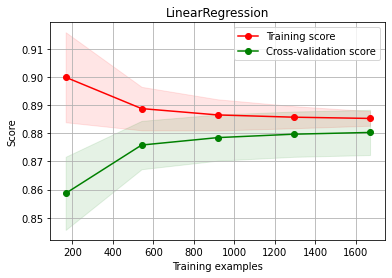

In [11]:
X = X_train_pca
y = y_train_pca
# 多元线性回归模型学习曲线图
title = "LinearRegression"

cv = ShuffleSplit(n_splits=100, test_size=0.25)

estimator = LinearRegression()    #建模

plot_learning_curve(estimator, title, X, y, cv = cv)

plt.savefig('./10-多元线性回归降维数据学习曲线.png',dpi = 200)

非降维数据学习曲线

[ 111  361  612  862 1113] (5, 100) (5, 100)


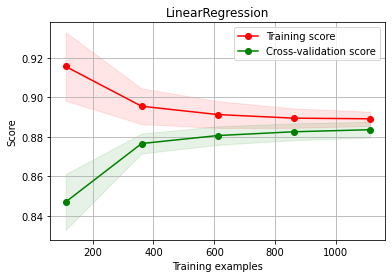

In [20]:
X = X_train
y = y_train
# 多元线性回归模型学习曲线图
title = "LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.5)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, cv = cv)
plt.savefig('./11-多元线性回归非降维数据学习曲线.png',dpi = 200)

#### 模型预测

降维数据建模预测

In [22]:
# 得分是：0.1598
model = LinearRegression()
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./多元线性回归模型预测(降维数据).txt',y_)

array([ 0.18802274,  0.24611291, -0.1557421 , ..., -2.46741335,
       -2.51810503, -2.23076209])

非降维数据建模预测

In [23]:
# 得分是：0.1620
model = LinearRegression()
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./多元线性回归模型预测(非降维数据).txt',y_)

array([ 0.180302  ,  0.21599399, -0.17268982, ..., -2.44517796,
       -2.44884392, -2.06587572])

### 随机森林模型建模

#### 模型训练

降维数据建模验证

In [24]:
model = RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='squared_error')
model.fit(X_train_pca, y_train_pca)
score = mean_squared_error(y_valid_pca, model.predict(X_valid_pca))
print("随机森林得分:   ", score)

随机森林得分:    0.1535330953946485


非降维数据建模验证

In [25]:
model = RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='squared_error')
model.fit(X_train, y_train)
score = mean_squared_error(y_valid, model.predict(X_valid))
print("随机森林得分:   ", score)

随机森林得分:    0.10046589910006855


#### 绘制学习曲线

绘制学习曲线比较耗时间，这里绘制非降维数据的学习曲线

[ 111  361  612  862 1113] (5, 100) (5, 100)
Wall time: 4min 53s


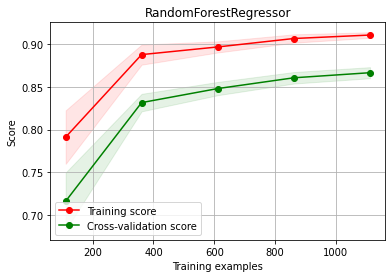

In [26]:
%%time
X = X_train
y = y_train
# 随机森林模型学习曲线图
title = "RandomForestRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.5)
model = RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='squared_error')
plot_learning_curve(model, title, X, y, cv = cv)
plt.savefig('./12-随机森林非降维数据学习曲线.png',dpi = 200)

#### 模型预测

降维数据建模预测

In [27]:
# 得分是：1.0579
model =  RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='squared_error')
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./随机森林模型预测(降维数据).txt',y_)

array([ 0.31543138,  0.23577324, -0.18489794, ..., -2.39873726,
       -2.41017305, -2.31572213])

In [28]:
# 得分是：0.1461
model = RandomForestRegressor(n_estimators=200, # 200棵树模型
                            max_depth= 10,
                            max_features = 'auto',# 构建树时，特征筛选量
                            min_samples_leaf=10,# 是叶节点所需的最小样本数
                            min_samples_split=40,# 是分割所需的最小样本数
                            criterion='squared_error')
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./随机森林模型预测(非降维数据).txt',y_)

array([ 0.31188585,  0.18338938, -0.085748  , ..., -2.65705188,
       -2.65935435, -2.65767658])

### SVR支持向量机

#### 模型训练

降维数据

In [30]:
model = SVR(kernel='rbf',C = 1,gamma=0.01,tol = 0.0001,epsilon=0.3)
model.fit(X_train_pca, y_train_pca)
score = mean_squared_error(y_valid_pca, model.predict(X_valid_pca))
print("SVR支持向量机得分:   ", score)

SVR支持向量机得分:    0.09631380213015923


非降维数据

In [31]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
score = mean_squared_error(y_valid, model.predict(X_valid))
print("SVR支持向量机得分:   ", score)

SVR支持向量机得分:    0.25202455384213157


#### 绘制学习曲线

降维数据

[ 111  361  612  862 1113] (5, 100) (5, 100)
Wall time: 22.5 s


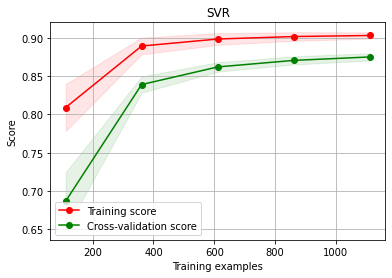

In [32]:
%%time
X = X_train_pca
y = y_train_pca
# 随机森林模型学习曲线图
title = "SVR"
cv = ShuffleSplit(n_splits=100, test_size=0.5)
model = SVR(kernel='rbf',C = 1,gamma=0.01,tol = 0.0001,epsilon=0.3)
plot_learning_curve(model, title, X, y, cv = cv)
plt.savefig('./15-SVR降维数据学习曲线.png',dpi = 200)

非降维数据

[ 111  361  612  862 1113] (5, 100) (5, 100)
Wall time: 53.6 s


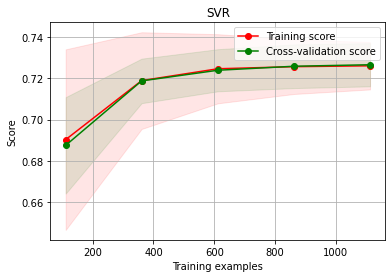

In [33]:
%%time
X = X_train
y = y_train
# 随机森林模型学习曲线图
title = "SVR"
cv = ShuffleSplit(n_splits=100, test_size=0.5)
model = SVR(kernel='rbf')
plot_learning_curve(model, title, X, y, cv = cv)
plt.savefig('./16-SVR非降维数据学习曲线.png',dpi = 200)

#### 模型预测

降维数据

In [34]:
# 得分是：0.2654
model =  SVR(kernel='rbf',C = 1,gamma=0.01,tol = 0.0001,epsilon=0.3)
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./SVR模型预测(降维数据).txt',y_)

array([ 0.26958642,  0.25920386, -0.10122391, ..., -2.22155225,
       -2.3239961 , -2.18865886])

非降维数据

In [35]:
# 得分是：1.9934
model =SVR(kernel='rbf')
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./SVR模型预测(非降维数据).txt',y_)

array([ 0.02366046,  0.0795185 , -0.3815812 , ..., -3.27797957,
       -3.20270896, -3.10625782])

poly多项式核函数建模预测--降维数据

In [36]:
# 得分是：4.7068
model =  SVR(kernel='poly')
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./SVR-poly模型预测(降维数据).txt',y_)

array([ 0.20042313,  0.26680596,  0.14459824, ..., -4.66039099,
       -3.79414397, -2.76923448])

poly多项式核函数建模预测--非降维数据

In [37]:
# 得分是：0.7423
model =SVR(kernel='poly')
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./SVR--poly模型预测(非降维数据).txt',y_)

array([-0.07224459, -0.04512705, -0.21601474, ..., -0.45687101,
       -0.45655309, -0.45593334])

### GBDT梯度提升树

#### 模型训练

降维数据

In [38]:
model = GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
model.fit(X_train_pca, y_train_pca)
score = mean_squared_error(y_valid_pca, model.predict(X_valid_pca))
print("GBDT得分:   ", score)

GBDT得分:    0.1052596997571393


非降维数据

In [39]:
model = GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
model.fit(X_train, y_train)
score = mean_squared_error(y_valid, model.predict(X_valid))
print("GBDT得分:   ", score)

GBDT得分:    0.08101773034345927


#### 绘制学习曲线

降维数据学习曲线

[ 111  361  612  862 1113] (5, 100) (5, 100)
Wall time: 11min 40s


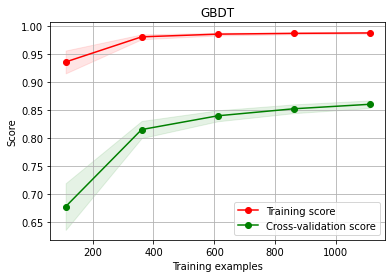

In [41]:
%%time
X = X_train_pca
y = y_train_pca
# 随机森林模型学习曲线图
title = "GBDT"
cv = ShuffleSplit(n_splits=100, test_size=0.5)
model = GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
plot_learning_curve(model, title, X, y, cv = cv)
plt.savefig('./17-GBDT降维数据学习曲线.png',dpi = 200)

#### 模型预测

降维数据

In [42]:
# 得分是：0.3765
model =  GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./GBDT模型预测(降维数据).txt',y_)

array([ 0.39815808,  0.20234983,  0.08249647, ..., -1.77946695,
       -1.92080868, -1.89811382])

非降维数据

In [43]:
# 得分是：0.1392
model = GradientBoostingRegressor(learning_rate=0.03, # 学习率
                                loss='huber',  # 损失函数
                                max_depth=14, # 决策树深度
                                max_features='sqrt',# 节点分裂时参与判断的最大特征数
                                min_samples_leaf=10,# 是叶节点所需的最小样本数
                                min_samples_split=40,# 是分割所需的最小样本数
                                n_estimators=300,# 集成树数量
                                subsample=0.8)# 抽样比例
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./GBDT模型预测(非降维数据).txt',y_)

array([ 4.45480904e-01,  3.03493216e-01, -2.65851462e-04, ...,
       -2.59291666e+00, -2.72350856e+00, -2.61891111e+00])

### lightGBM

#### 模型训练

降维数据

In [44]:
model = lgb.LGBMRegressor(learning_rate=0.05, # 学习率
                        n_estimators=300,# 集成树数量
                        min_child_samples=10,# 是叶节点所需的最小样本数
                        max_depth=5, # 决策树深度
                        num_leaves = 25,
                        colsample_bytree =0.8,#构建树时特征选择比例
                        subsample=0.8,# 抽样比例
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
model.fit(X_train_pca, y_train_pca)
score = mean_squared_error(y_valid_pca, model.predict(X_valid_pca))
print("LGB得分:   ", score)

LGB得分:    0.10182794462374979


非降维数据

In [45]:
model = lgb.LGBMRegressor(learning_rate=0.05, # 学习率
                        n_estimators=300,# 集成树数量
                        min_child_samples=10,# 是叶节点所需的最小样本数
                        max_depth=5, # 决策树深度
                        num_leaves = 25,
                        colsample_bytree =0.8,#构建树时特征选择比例
                        subsample=0.8,# 抽样比例
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
model.fit(X_train, y_train)
score = mean_squared_error(y_valid, model.predict(X_valid))
print("LGB得分:   ", score)

LGB得分:    0.08322484041916056


#### 绘制学习曲线

降维数据

[ 111  361  612  862 1113] (5, 100) (5, 100)
Wall time: 1min 17s


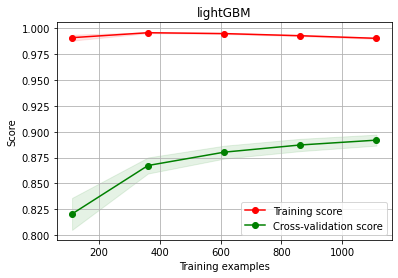

In [46]:
%%time
X = X_train
y = y_train
# lightGBM模型学习曲线图
title = "lightGBM"
cv = ShuffleSplit(n_splits=100, test_size=0.5)
model = lgb.LGBMRegressor(learning_rate=0.05, # 学习率
                        n_estimators=300,# 集成树数量
                        min_child_samples=10,# 是叶节点所需的最小样本数
                        max_depth=5, # 决策树深度
                        num_leaves = 25,
                        colsample_bytree =0.8,#构建树时特征选择比例
                        subsample=0.8,# 抽样比例
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
plot_learning_curve(model, title, X, y, cv = cv)
plt.savefig('./22-lightGBM非降维数据学习曲线.png',dpi = 200)

#### 模型预测

降维数据

In [47]:
# 得分是：0.6383
model =  lgb.LGBMRegressor(learning_rate=0.05, # 学习率
                        n_estimators=100,# 集成树数量
                        min_child_samples=10,# 是叶节点所需的最小样本数
                        max_depth=5, # 决策树深度
                        num_leaves = 25,
                        colsample_bytree =0.8,#构建树时特征选择比例
                        subsample=0.8,# 抽样比例
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./lightGBM模型预测(降维数据).txt',y_)

array([ 0.27629405,  0.26720862,  0.04551531, ..., -1.88494216,
       -2.03600739, -1.76903934])

非降维数据

In [48]:
# 得分是：0.1378
model = lgb.LGBMRegressor(learning_rate=0.05, # 学习率
                        n_estimators=100,# 集成树数量
                        min_child_samples=10,# 是叶节点所需的最小样本数
                        max_depth=5, # 决策树深度
                        num_leaves = 25,
                        colsample_bytree =0.8,#构建树时特征选择比例
                        subsample=0.8,# 抽样比例
                        reg_alpha = 0.5,
                        reg_lambda = 0.1 )
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./lightGBM模型预测(非降维数据).txt',y_)

array([ 0.31735247,  0.21516006, -0.02321356, ..., -2.63261151,
       -2.64385024, -2.71366543])

### Xgboost

#### 模型训练

降维数据

In [49]:
model = XGBRFRegressor(n_estimators = 300, 
                       max_depth=15,
                       subsample = 0.8,
                       colsample_bytree = 0.8,
                       learning_rate =1,
                       gamma = 0,
                       reg_lambda= 0 ,# L2正则化
                       reg_alpha = 0,verbosity=1)# L1正则化
model.fit(X_train_pca, y_train_pca)
score = mean_squared_error(y_valid_pca, model.predict(X_valid_pca))
print("Xgboost得分:   ", score)

Xgboost得分:    0.13430091438485942


非降维数据

In [50]:
model = XGBRFRegressor(n_estimators = 300, 
                       max_depth=15,
                       subsample = 0.8,
                       colsample_bytree = 0.8,
                       learning_rate =1,
                       gamma = 0,
                       reg_lambda= 0 ,# L2正则化
                       reg_alpha = 0,verbosity=1)# L1正则化
model.fit(X_train, y_train)
score = mean_squared_error(y_valid, model.predict(X_valid))
print("Xgboost得分:   ", score)

Xgboost得分:    0.08908612728637443


#### 模型预测

降维数据

In [51]:
# 得分是：0.6798
model = XGBRFRegressor(n_estimators = 300, 
                       max_depth=15,
                       subsample = 0.8,
                       colsample_bytree = 0.8,
                       learning_rate =1,
                       gamma = 0,
                       reg_lambda= 0 ,# L2正则化
                       reg_alpha = 0,verbosity=1)# L1正则化
model.fit(train_data_pca,target_data_pca)
y_ = model.predict(test_data_pca)
display(y_)
np.savetxt('./Xgboost模型预测(降维数据).txt',y_)

array([ 0.39872065,  0.29756796,  0.06591171, ..., -1.8471452 ,
       -1.8405936 , -1.7466732 ], dtype=float32)

非降维数据

In [52]:
# 得分是：0.1329
model = XGBRFRegressor(n_estimators = 300, 
                       max_depth=15,
                       subsample = 0.8,
                       colsample_bytree = 0.8,
                       learning_rate =1,
                       gamma = 0,
                       reg_lambda= 0 ,# L2正则化
                       reg_alpha = 0,verbosity=1)# L1正则化
model.fit(train_data.drop('target',axis = 1),train_data['target'])
y_ = model.predict(test_data)
display(y_)
np.savetxt('./Xgboost模型预测(非降维数据).txt',y_)

array([ 0.38381824,  0.21534394, -0.04474839, ..., -2.7662156 ,
       -2.7820516 , -2.8380976 ], dtype=float32)